In [1]:
import numpy as np
import web2png
import PIL
import os
from PIL import Image
from IPython.display import Image, display

def get_random_fen():
    fen_chars = list('1KQRBNPkqrbnp')
    pieces = np.random.choice(fen_chars, 64)
    fen = '/'.join([''.join(pieces[i*8:(i+1)*8]) for i in range(8)])
    # can append ' w' or ' b' for white/black to play, defaults to white
    return fen

fen = get_random_fen()
print(fen + ' w KQkq - 0 1')
print(fen.replace('/','-'))

bQnkqQbk/krqQKqqq/NrbnrkNp/QbqKRnbN/qnQBNNNN/PkpNQb1N/n1NbQKNB/rbnQQrRp w KQkq - 0 1
bQnkqQbk-krqQKqqq-NrbnrkNp-QbqKRnbN-qnQBNNNN-PkpNQb1N-n1NbQKNB-rbnQQrRp


In [2]:
# Set up URL and output image filename for this run
url = "http://en.lichess.org/editor/%s" % get_random_fen()
output_filename = "test.png"

status = web2png.take_screenshot(url,output_filename)
if status == 0:
    print("Success")
else:
    print("Failed on %s -> %s" % (url, output_filename))

Success


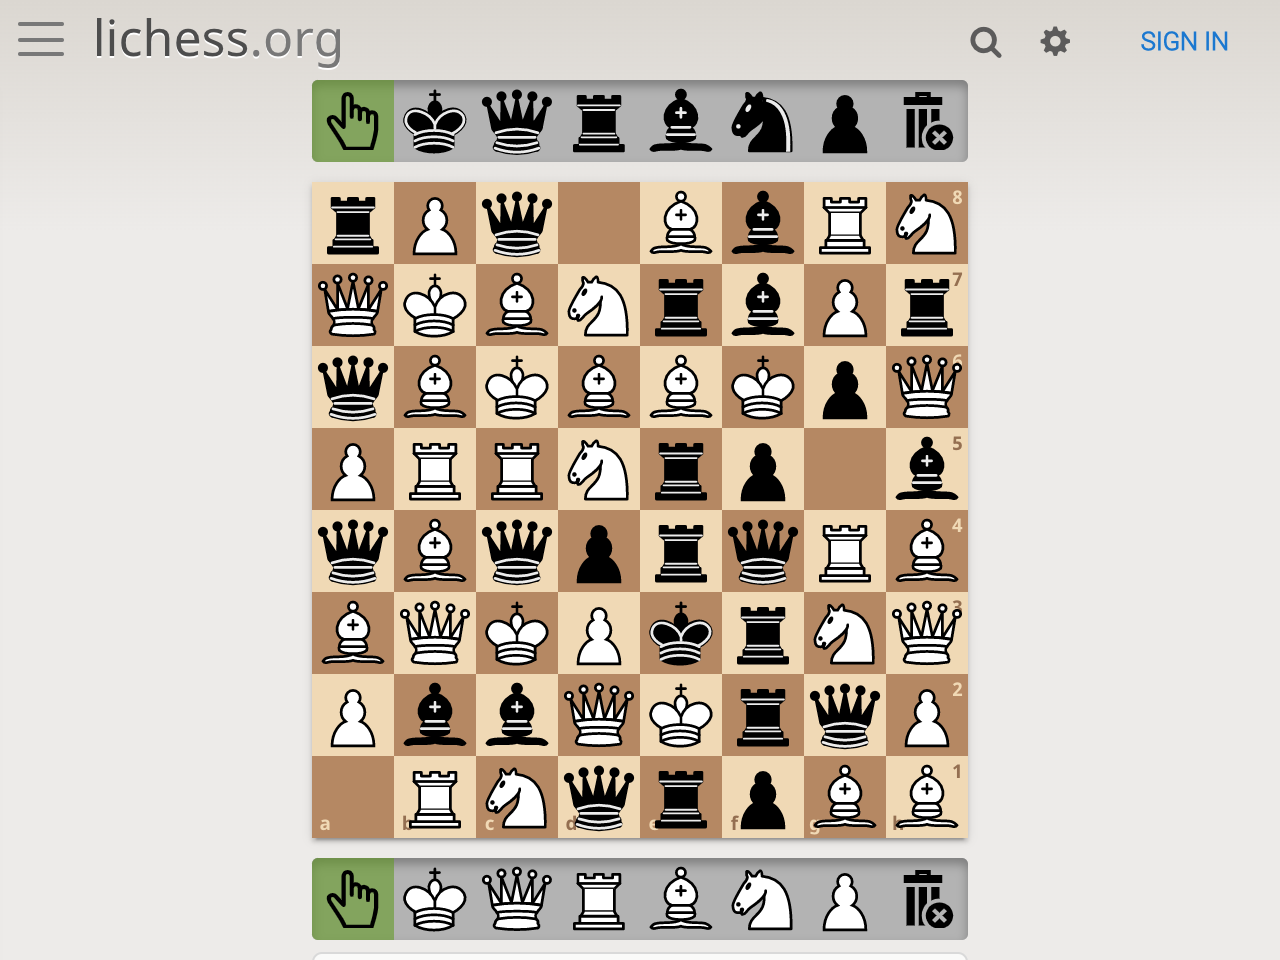

In [3]:
display(Image("test.png"))

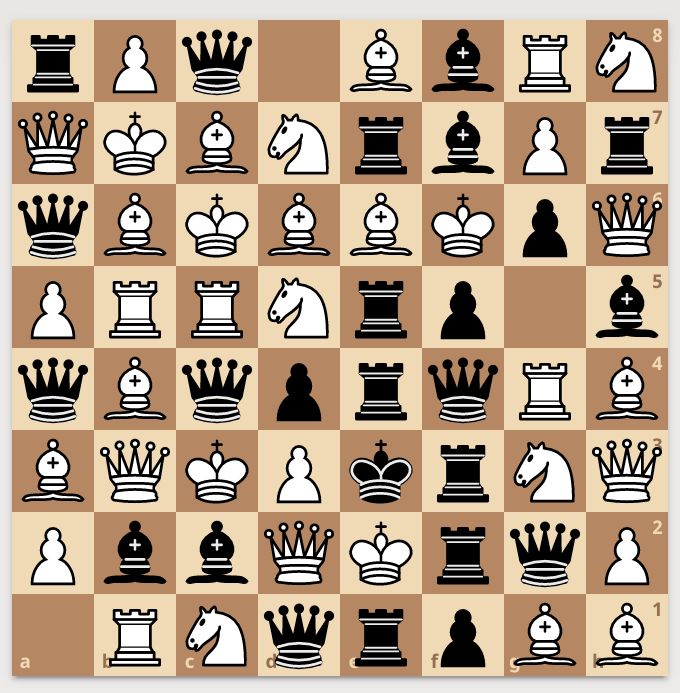

In [4]:
# crop boundaries 

im = PIL.Image.open("test.png")
im = im.crop([300,162,980,855])
im.save("test_crop.png")
display(Image("test_crop.png"))

In [5]:
# Number of random screenshots to generate
N = 50

out_folder = 'train_boards'
if not os.path.exists(out_folder):
    os.mkdir(out_folder)

for i in range(N):
    # Generate random FEN
    fen = get_random_fen()
    
    print("#%d : %s" % (i,fen))
    output_filename = "%s/lichess_%04d_%s.png" % (out_folder, i, fen.replace('/','-'))
    
    # Render webpage and save screenshot
    status = web2png.take_chess_screenshot(fen,output_filename)
    
    if status == 0:
        print("\t...Success")
    else:
        print("\tFailed on %s -> %s" % (fen, output_filename))
        break
    
    # Load image, crop and overwrite file
    im = PIL.Image.open(output_filename).crop([300,162,980,855]).save(output_filename)

#0 : 1Kk1bBRR/kqpPnPkK/Rbnk1BRn/QpqnRnqN/KnrbkNkq/Q1RKQPRB/RPbQPbNK/KBkkKRNK
	...Success
#1 : nrPBr11n/pKbpQRBq/NpBKk1pQ/kBnNKQ1P/NQQPNNNb/QPnnbpnK/RprprKPQ/KBrnpppK
	...Success
#2 : r1B1QqBr/kKBbQPpK/kKqPQprb/bbqRPbPr/rBkqRqqp/1RRbRKrn/R11Pqbqb/PQNRrbpP
	...Success
#3 : pq1KNNNn/KQrBqqKR/rQkbbkbR/nNNnbnRr/Pqq1bQ1q/R1BpNnPn/Kp1PrppK/BnqBrKRr
	...Success
#4 : 1BqqRQkN/PqrQPpBb/PkR1KRqr/kkqNbPpp/QBqrqRkP/q1Pp1bkP/BrkqB1pp/p1BBRqkp
	...Success
#5 : NQP1pqQP/KpbrrKnB/RBbbbbPB/QnPKNqrr/QBrQ1qqR/QnQppNKr/BR1P1KQP/NBNQnnqq
	...Success
#6 : NnpbprNR/krnkKPBb/kqKN1pnp/BKbqPNqQ/pRnBnB1N/11PbQ1b1/rPPKnQbn/q1krkrrQ
	...Success
#7 : bBQbrkQq/r1NBPQpB/NnpRQrQQ/Kp1PKBnP/B1nR1knB/nrPRQPNb/pBQrNnpn/b1KrBrnn
	...Success
#8 : qBNbbQBk/QQbPNqRQ/BQBBk1pB/rbqpRpQb/bkKpq1Pb/PNBRbBBq/pnqpQRPb/KrBnQpnB
	...Success
#9 : rknbBBPr/NBrrNbbN/KbbrQNQR/Kqr1bbqb/BBrnQrNr/rr1N1BRK/bPQqBBNp/pnrQNn1Q
	...Success
#10 : KK1rQRN1/nPnKnpbp/QR1Qn11N/PkqBNNR1/PRrPrRb1/KQbbkNKP/QBbKbkbq/pb1N1qBK
	...Success
#11 : 1qqkrqQn/Qkbrn

In [6]:
from tileset_generator import generate_tileset

out_folder = 'train_boards'
out_tile_folder = 'train_tiles'
generate_tileset(out_folder,out_tile_folder)

------
1/50 : train_boards/lichess_0032_BkRpNBkR-pkp1Q1Bk-KqbBpn1p-RKpkrnBN-PqKkknR1-NKbbkn1n-1RpnBbqK-Qb1kNbbk.png
Loading train_boards/lichess_0032_BkRpNBkR-pkp1Q1Bk-KqbBpn1p-RKpkrnBN-PqKkknR1-NKbbkn1n-1RpnBbqK-Qb1kNbbk.png...
Generating tiles for lichess_0032_BkRpNBkR-pkp1Q1Bk-KqbBpn1p-RKpkrnBN-PqKkknR1-NKbbkn1n-1RpnBbqK-Qb1kNbbk...
Chessboard found
Saving tiles lichess_0032_BkRpNBkR-pkp1Q1Bk-KqbBpn1p-RKpkrnBN-PqKkknR1-NKbbkn1n-1RpnBbqK-Qb1kNbbk...
------
2/50 : train_boards/lichess_0028_kRbrRqqr-br1Q1nBn-Bbq1NRPn-B1NPnPqP-rkknNKKp-NNB11rQQ-B1RbbNrP-QkPKQPnB.png
Loading train_boards/lichess_0028_kRbrRqqr-br1Q1nBn-Bbq1NRPn-B1NPnPqP-rkknNKKp-NNB11rQQ-B1RbbNrP-QkPKQPnB.png...
Generating tiles for lichess_0028_kRbrRqqr-br1Q1nBn-Bbq1NRPn-B1NPnPqP-rkknNKKp-NNB11rQQ-B1RbbNrP-QkPKQPnB...
Chessboard found
Saving tiles lichess_0028_kRbrRqqr-br1Q1nBn-Bbq1NRPn-B1NPnPqP-rkknNKKp-NNB11rQQ-B1RbbNrP-QkPKQPnB...
------
3/50 : train_boards/lichess_0030_1rnB1QRQ-RkpqpNNN-bpBR1kNK-pRPKPbNK-1KqRrpbN-BQ1

Chessboard found
Saving tiles lichess_0042_NK1bkQKQ-kbQPBpnb-krKR1bNN-krKKpnbP-RQBBknnN-QnbnKkNN-NqrqQkqq-bk1bkkRB...
------
20/50 : train_boards/lichess_0023_1b1QrPqQ-BPprqQkq-KQkQ1r1r-NqnRBKqb-qqknb1rQ-rkKKP1Bp-RR1PrknK-kkKnRbbP.png
Loading train_boards/lichess_0023_1b1QrPqQ-BPprqQkq-KQkQ1r1r-NqnRBKqb-qqknb1rQ-rkKKP1Bp-RR1PrknK-kkKnRbbP.png...
Generating tiles for lichess_0023_1b1QrPqQ-BPprqQkq-KQkQ1r1r-NqnRBKqb-qqknb1rQ-rkKKP1Bp-RR1PrknK-kkKnRbbP...
Chessboard found
Saving tiles lichess_0023_1b1QrPqQ-BPprqQkq-KQkQ1r1r-NqnRBKqb-qqknb1rQ-rkKKP1Bp-RR1PrknK-kkKnRbbP...
------
21/50 : train_boards/lichess_0047_1RbrpnKp-NqnPNQkP-Nr1QRBkp-pPNPBB11-R1QQkKPb-1brbbqnQ-RkBKBBp1-kNR1brb1.png
Loading train_boards/lichess_0047_1RbrpnKp-NqnPNQkP-Nr1QRBkp-pPNPBB11-R1QQkKPb-1brbbqnQ-RkBKBBp1-kNR1brb1.png...
Generating tiles for lichess_0047_1RbrpnKp-NqnPNQkP-Nr1QRBkp-pPNPBB11-R1QQkKPb-1brbbqnQ-RkBKBBp1-kNR1brb1...
Chessboard found
Saving tiles lichess_0047_1RbrpnKp-NqnPNQkP-Nr1QRBkp-pPNPBB11-R1QQkKP

Chessboard found
Saving tiles lichess_0035_nkppq11q-knrBkQrk-1Kq1NnkK-bqnKqbRK-KBqQrPpk-kP1RkkP1-NPkQkpNr-rqbBQnPQ...
------
39/50 : train_boards/lichess_0002_r1B1QqBr-kKBbQPpK-kKqPQprb-bbqRPbPr-rBkqRqqp-1RRbRKrn-R11Pqbqb-PQNRrbpP.png
Loading train_boards/lichess_0002_r1B1QqBr-kKBbQPpK-kKqPQprb-bbqRPbPr-rBkqRqqp-1RRbRKrn-R11Pqbqb-PQNRrbpP.png...
Generating tiles for lichess_0002_r1B1QqBr-kKBbQPpK-kKqPQprb-bbqRPbPr-rBkqRqqp-1RRbRKrn-R11Pqbqb-PQNRrbpP...
Chessboard found
Saving tiles lichess_0002_r1B1QqBr-kKBbQPpK-kKqPQprb-bbqRPbPr-rBkqRqqp-1RRbRKrn-R11Pqbqb-PQNRrbpP...
------
40/50 : train_boards/lichess_0031_1qqP1Brk-b1nBQQpP-BR1bqPkB-kqBqq1Bk-rPPrrbkp-rkQqRKKq-BqbbNRrR-PkRnpQnk.png
Loading train_boards/lichess_0031_1qqP1Brk-b1nBQQpP-BR1bqPkB-kqBqq1Bk-rPPrrbkp-rkQqRKKq-BqbbNRrR-PkRnpQnk.png...
Generating tiles for lichess_0031_1qqP1Brk-b1nBQQpP-BR1bqPkB-kqBqq1Bk-rPPrrbkp-rkQqRKKq-BqbbNRrR-PkRnpQnk...
Chessboard found
Saving tiles lichess_0031_1qqP1Brk-b1nBQQpP-BR1bqPkB-kqBqq1Bk-rPPrrbk